Feature extraction

help summarize the information content in a dataset by transforming it into a new feature subspace of lower dimensionality

Data compression helps to sore and analyze data

Principal components analysis - unsupervised data compression

Linear discriminant analysis - supervised dimensionality reduction technique for maximizing class separability

Non-linear dimensionality reduction techniques and t-distributed stochastic neighbour embedding for data visualization

### Main steps of PCA

For feature extraction and dimensionality reduction

Other uses:

* Exploratory data analysis (EDA)
* Denoising of signals in stock markets
* Analysis of genome data

Identiy patterns in data based on correlation between features

PCA aims to find the directions of maximum variance in high dimensional data and projects data onto new subspace with equal or fewer dimensions than original one

The orthogonal axes ( principal components ) of new subspace interpreted as directions of maximum variance given constraint that new feature axes orthogonal to each other

After applying transformation from d to k dimensional subspace the first principal component will have largest possible variance

All consequent principal components will have largest variance given constraint that these components are uncorrelated ( orthogonal ) to other principal components - even if input features correlated, the resulting principal components will be mutually orthogonal ( uncorrelated )

PCA directions highly sensitive to data scaling hence need to standardize features before input into PCA

#### Pseudo code

* Standardize d-dimensional dataset
* Construct covariance matrix
* Decompose covariance matrix into eigenvectors and eigenvalues
* Sort the eigenvalues by decreasing order to rank the eigenvectors
* Select k eigenvectors, which correspond to k largets eigenvalyes where k < d
* Construct projection matrix W from top eigenvectors
* Transform d-dimensional input X, using projection matrix W, to obtain new k-dimensional feature subspace

Covariance matrix => symmetric matrix where matrix is equals to its transpose
i.e. A = A(transpose)

covariance matrix stores the pairwise covariances between different features

positive covariance between 2 features indicate that the feature increase or decrease together; whereas a negative covariance indicates features vary in opposite directions


when we decompose a symmetric matrix the eigenvalues are real and the eigenvectors are orthogonal ( perpendicular ) to each other

eigenvalues and eigenvectors come in pairs

eigenvectors associated with highest eigenvalue corresponds to direction of maximum variance in dataset

PCA is an unsupervised learning that doesn't use any class label information

In [1]:
import pandas as pd

df_wine = pd.read_csv(
    'https://archive.ics.uci.edu/ml/'
    'machine-learning-databases/wine/wine.data',
    header=None
)

df_wine.columns = [
    'Class label', 
    'Alcohol',
    'Malic acid',
    'Ash',
    'Alcalinity of ash',
    'Magnesium',
    'Total phenols',
    'Flavanoids',
    'Nonflavanoid phenols',
    'Proanthocyanins',
    'Color intensity', 
    'Hue',
    'OD280/OD315 of diluted wines',
    'Proline'
]

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=0)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
print(X_train_std.shape)

(124, 13)


In [5]:
import numpy as np

cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('Eigen vals ', eigen_vals)
print(eigen_vecs.shape)

Eigen vals  [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]
(13, 13)


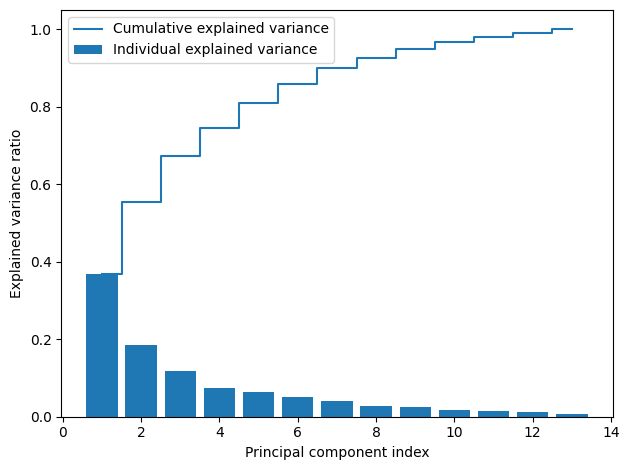

In [6]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
# print(cum_var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1, 14), var_exp, align='center', label='Individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [7]:
# make list of (eigenvalue, eigenvectors) tuples

eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# sort tuples from high to low based on descending eigen vals
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [8]:
# select two highest eigenvectors which captures about 60% of variance in dataset
# based on above plot

w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print(w)

[[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


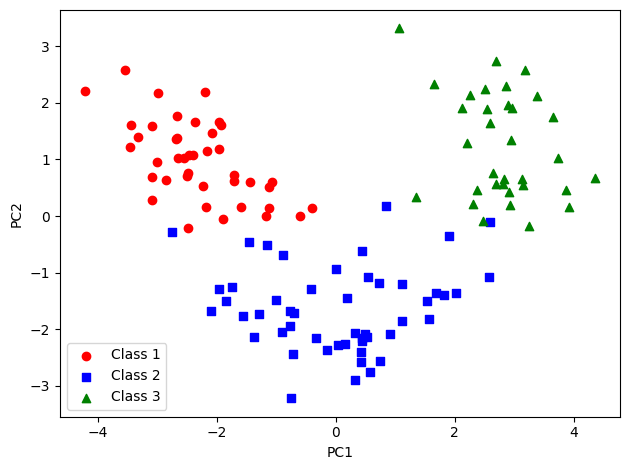

In [9]:
X_train_pca = X_train_std.dot(w)

colors = ['r', 'b', 'g']
markers = ['o', 's', '^']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(
        X_train_pca[y_train==l, 0],
        X_train_pca[y_train==l, 1],
        c=c, label=f'Class {l}', marker=m)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

#### PCA in scikit-learn

PCA transformer class in sklearn where we fit model using training data nad then transform both training and test dataset afterwards...



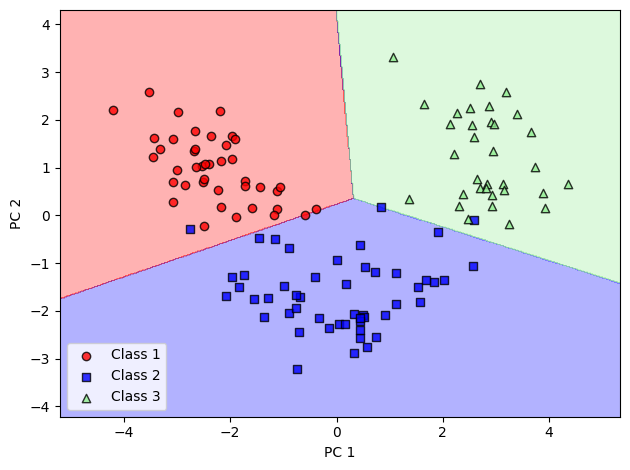

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from plot_decision_regions_script import plot_decision_regions

pca = PCA(n_components=2)

lr = LogisticRegression(
    multi_class='ovr',
    random_state=1,
    solver='lbfgs'
)

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr.fit(X_train_pca, y_train)

plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

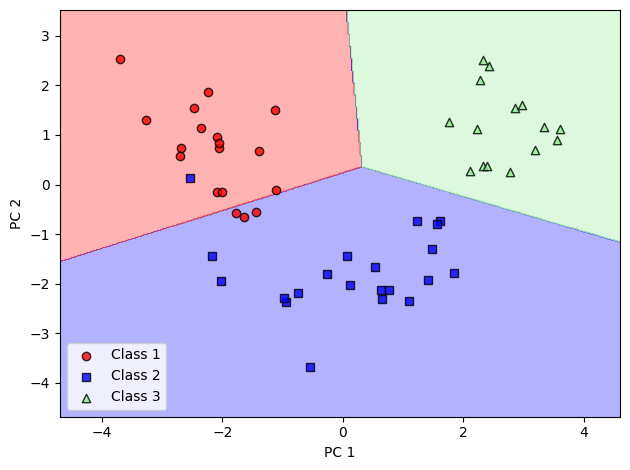

In [11]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [12]:
print(pca.components_)
print()
print(pca.explained_variance_)

[[-0.13724218  0.24724326 -0.02545159  0.20694508 -0.15436582 -0.39376952
  -0.41735106  0.30572896 -0.30668347  0.07554066 -0.32613263 -0.36861022
  -0.29669651]
 [ 0.50303478  0.16487119  0.24456476 -0.11352904  0.28974518  0.05080104
  -0.02287338  0.09048885  0.00835233  0.54977581 -0.20716433 -0.24902536
   0.38022942]]

[4.84274532 2.41602459]


### Feature contributions

The factor loadings can be computed by scaling the eigenvectors by the square root of the eigenvalues. The resulting values can then be interpreted as the correlation between the original features and the principal component.

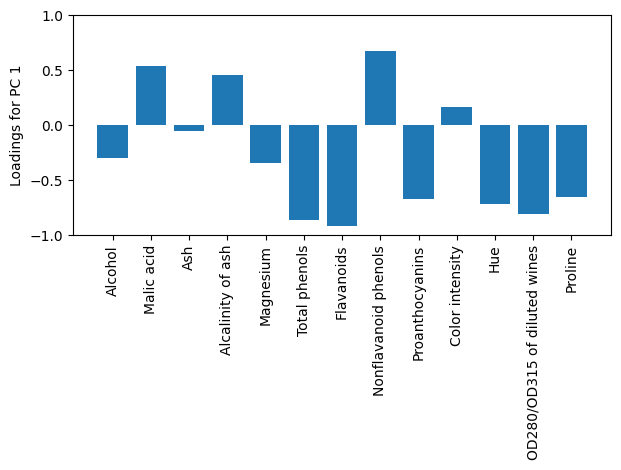

In [13]:
# SHow how much feature contributes to given principal component
loadings = eigen_vecs * np.sqrt(eigen_vals)

fig, ax = plt.subplots()
ax.bar(range(13), loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

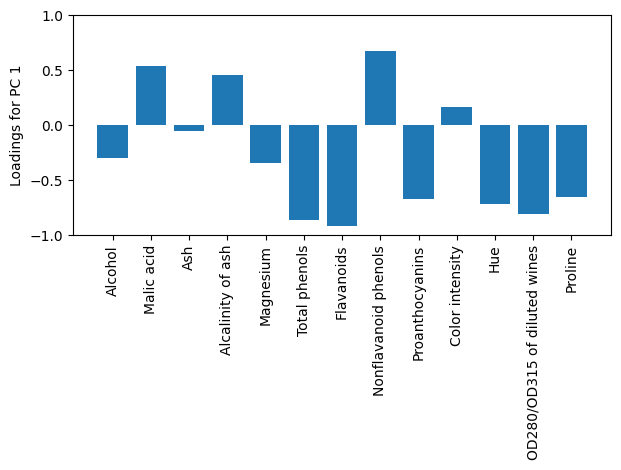

In [14]:
# same but using sklearn pca model
sklearn_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig, ax = plt.subplots()
ax.bar(range(13), sklearn_loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

### LDA - LInear Discriminant Analysis

Supervised technique compared to PCA

Find feature subspace that optimizes class separability

Both PCA and LDA are linear transformation techniques to reduce dimensions in a dataset

Assumption in LDA:
* data is normally distributed
* Classes have identical covariance matrix
* training examples statiscally independent of each other

LDA still works reasonably well for dimensionality reduction even if one or more of those assumptions slightly violated


### LDA pseudocode

* Standardize d-dimensional dataset
* Compute d-dimensional mean vector for each class
* Construct class scatter matrix SB and within-class scatter matrix SW
* Compute eigenvectors and eigenvalues of matrix, SW-1 * SB
* Sort eigenvalues by decreasing order to rank corresponding eigenvectors
* Choose k eigenvectors that correspond to k largest eigenvalues to construct d x k transformation matrix, W; eigenvectors are columns of this matrix
* Project examples onto new feature subspace using matrix W



In [15]:
print(np.unique(y_train))

[1 2 3]


In [16]:
mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(
        np.mean(X_train_std[y_train==label], axis=0)
    )
    print(f'MV {label}: {mean_vecs[label - 1]}')


MV 1: [ 0.9065826  -0.34973457  0.32010329 -0.71891449  0.50558678  0.88069702
  0.95894709 -0.55161049  0.54159322  0.23383109  0.58971299  0.65631399
  1.20749382]
MV 2: [-0.87487963 -0.28480003 -0.37347228  0.31571225 -0.38480347 -0.04332505
  0.06345321 -0.09460613  0.07034749 -0.82860474  0.31436962  0.36084258
 -0.72528643]
MV 3: [ 0.199215    0.8660339   0.168163    0.41484489 -0.04511771 -1.02855532
 -1.28756034  0.82867687 -0.77947565  0.96494432 -1.20899133 -1.36215159
 -0.40130076]


In [17]:
d = 13 # num of features
S_W = np.zeros((d, d))

for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_W += class_scatter

print(f'Scaled within-class scatter matrix: {S_W.shape}')


Scaled within-class scatter matrix: (13, 13)


In [18]:
mean_overall = np.mean(X_train_std, axis=0)
mean_overall = mean_overall.reshape(d, 1)

d = 13 # num  of features

S_B = np.zeros((d, d))

for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train==1+1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1) # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
    
print(f'Between class scatter matrix: {S_B.shape}')

Between class scatter matrix: (13, 13)


In [19]:
eigen_vals, eigen_vecs = np.linalg.eig(
    np.linalg.inv(S_W).dot(S_B))

In [24]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i])
                for i in range(len(eigen_vals))]

eigen_pairs = sorted(eigen_pairs, 
                     key=lambda k: k[0], reverse=True)

print('Eigenvalues in descending order\n')

for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order

484.7959455699832
195.67832733049707
4.074735831306535e-14
4.074735831306535e-14
3.421047429363336e-14
3.421047429363336e-14
2.842170943040401e-14
2.3550726607039277e-14
1.8833458196494257e-14
1.8833458196494257e-14
9.662396848073066e-15
4.34492941637692e-15
2.1334405199101989e-16


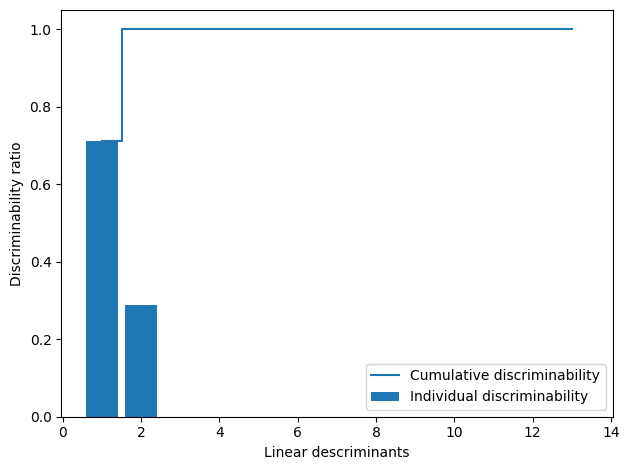

In [26]:
# plot explained plot

tot = sum(eigen_vals.real)
discr = [(i/tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 14), discr, align='center', label='Individual discriminability')
plt.step(range(1, 14), cum_discr, where='mid', label='Cumulative discriminability')
plt.ylabel('Discriminability ratio')
plt.xlabel('Linear descriminants')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [28]:
W = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
               eigen_pairs[1][1][:, np.newaxis].real))

print(f'Matrix:\n {W}\n')

Matrix:
 [[-0.12290282 -0.41933995]
 [ 0.10089187 -0.14575857]
 [ 0.00530062 -0.35059121]
 [ 0.12865723  0.33371047]
 [-0.0112811  -0.08230282]
 [ 0.1865844   0.10348605]
 [-0.75352901  0.19993132]
 [-0.07459794 -0.01804034]
 [-0.00381708  0.08958807]
 [ 0.30833027 -0.18078638]
 [-0.05010725  0.26737991]
 [-0.35490008 -0.05020566]
 [-0.35535363 -0.62938709]]



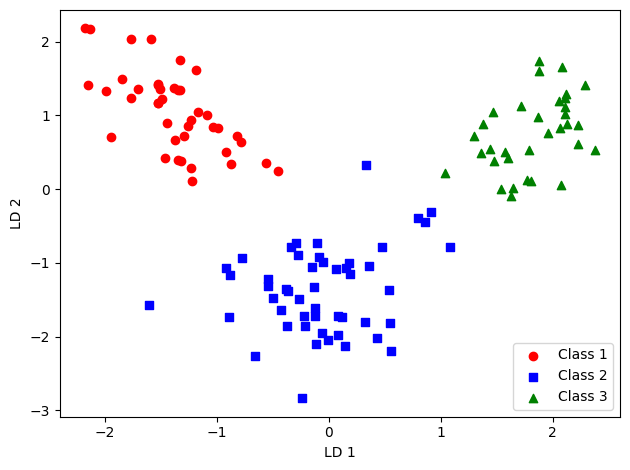

In [29]:
X_train_lda = X_train_std.dot(W)

colors = ['r', 'b', 'g']
markers = ['o', 's', '^']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(
        X_train_lda[y_train==l, 0],
        X_train_lda[y_train==l, 1] * (-1),
        c=c, label=f'Class {l}', marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)

X_train_lda = lda.fit_transform(X_train_std, y_train)

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_lda, y_train)

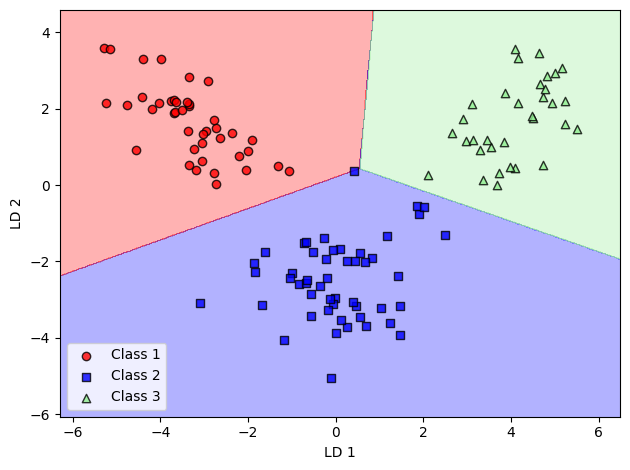

In [32]:
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

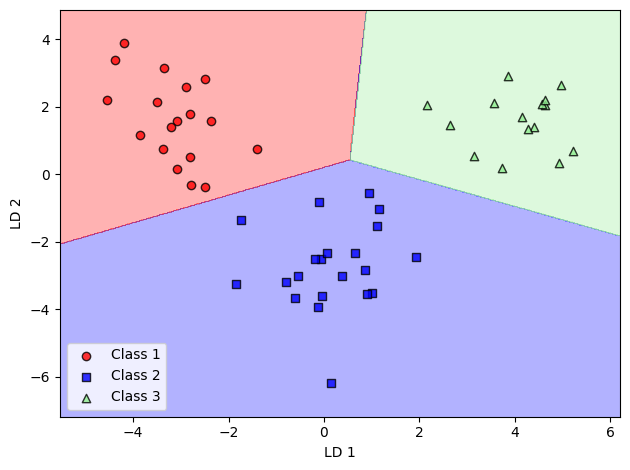

In [33]:
X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

### Non-linear dimensionality reduction


Both PCA and LDA are linear transformation techniques for feature extraction

t-SNE => t-distributed stocahstic neighbor embedding

Used to visualize high dimensional datasets in 2 / 3 dimensions

in scikit-learn advanced dimensionality reduction for non-linear data can be found at: http://scikit-learn.org/stable/modules/manifold.html

#### Manifold learning
manifold refers to a lower dimensional space embedded in high dimensional space

algos for manifold learning have to capture complicated structure of data in order to project it into lower-dimensional space where releationship between data points preserved

t-SNE is modelling data points based on their pair-wise distances in high dimensional / original feature space

Then it tries to find a prob distribution of pair-wise distances in new lower dimensional space that's close to the prob distribution of pair-wise distances in original space

i.e. t-SNE learns to embed data points into lower-dimensional space such that the pairwise distances in original space are preserved...


Visualizing data using t-SNE by Maaten and Hinton, Journal of Machine Learning Research, 2018 (https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)


unlike PCA, t-SNE doesn't use a projection matrix so we cannot apply it to new data points

note, in example below, we use **init=pca** which init TSNE to use PCA as its recommened:

Initialization is critical for preserving global data structure in both t-SNE and UMAP by Kobak and Linderman, Nature Biotechnology Volume 39, pages 156–157, 2021 (https://www.nature.com/articles/s41587-020-00809-z)

t-SNE includes hyperparams which can be tuned:

How to Use t-SNE Effectively by Wattenberg, Viegas, and Johnson, Distill, 2016 (https://distill.pub/2016/misread-tsne/)

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()

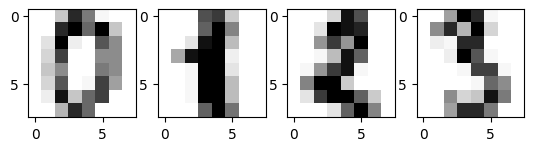

In [5]:
fig, ax = plt.subplots(1, 4)

for i in range(4):
    ax[i].imshow(digits.images[i], cmap='Greys')

plt.show()

In [6]:
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


In [7]:
X_digits = digits.data
y_digits = digits.target

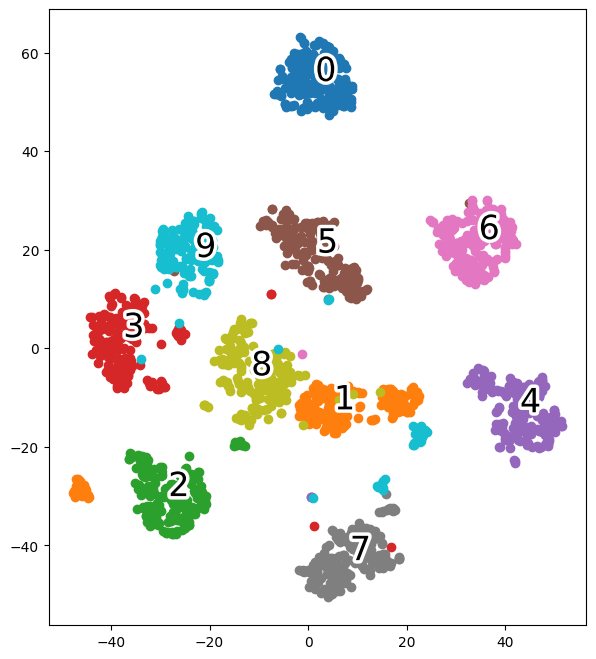

In [16]:
from sklearn.manifold import TSNE
from plot_decision_regions_script import plot_projection

tsne = TSNE(
    n_components=2,
    init='pca',
    random_state=123)

X_digits_tsne = tsne.fit_transform(X_digits)
plot_projection(X_digits_tsne, y_digits)

Uniform manifold approximation and projection => UMAP

UMAP is faster than t-SNE and can project new data

UMAP: Uniform manifold approximation and projection for dimension reduction by McInnes, Healy, and Melville, 2018 (https://arxiv.org/abs/1802.03426)

scikit-learn implementation: https://umap-learn.readthedocs.io.

In [13]:
import numpy as np
import umap

reducer = umap.UMAP(random_state=42)
reducer.fit(X_digits)

/media/chee/DISK D/ML_PYTORCH_SKLEARN/mlvenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(n_jobs=1, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [15]:
embedding = reducer.transform(X_digits)
assert(np.all(embedding == reducer.embedding_))
print(embedding.shape)

(1797, 2)


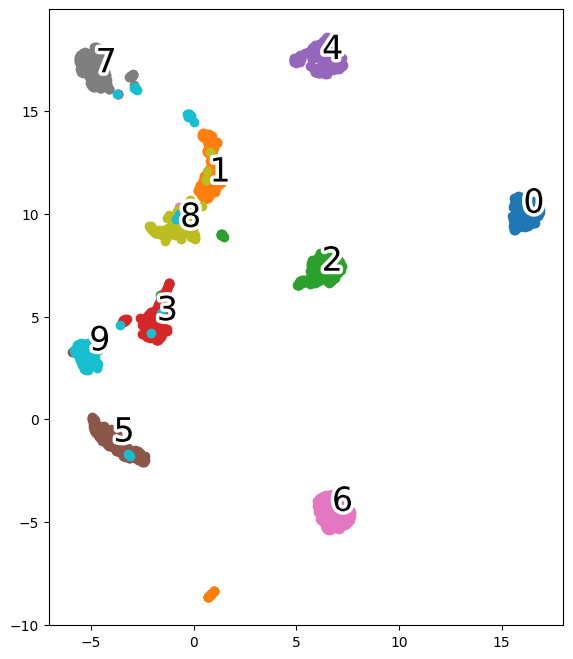

In [17]:
plot_projection(embedding, y_digits)